In [14]:
import warnings
import sys
import os

warnings.filterwarnings('ignore')
os.environ["CUDA_VISIBLE_DEVICES"] = ''
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.95'
os.environ['JAX_PLATFORMS'] = 'cpu'
sys.path.append('/mnt/local/data/vtrifonov/prec-learning-Notay-loss/')

import jax.numpy as jnp
import pandas as pd
from utils import parse_run, read_meta_data, df_threshold_residuals
import matplotlib.pyplot as plt

In [15]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
dir_name32_64 = 'div_k_grad_full_dataset'
div_k_grad32_64 = pd.read_csv(os.path.join(path, dir_name, 'meta_data.csv'), index_col=0)

dir_name128 = 'div_k_grad05_128_full_dataset'
div_k_grad128 = pd.read_csv(os.path.join(path, dir_name, 'meta_data.csv'), index_col=0)

run_name_32 = 'mn70w2'
run_name_64 = 'xjfmrp'
run_name_128 = 'yfbetl'

run_32 = jnp.load(os.path.join(path, dir_name32_64, run_name_32+'.npz'))
run_64 = jnp.load(os.path.join(path, dir_name32_64, run_name_64+'.npz'))
run_128 = jnp.load(os.path.join(path, dir_name128, run_name_128+'.npz'))

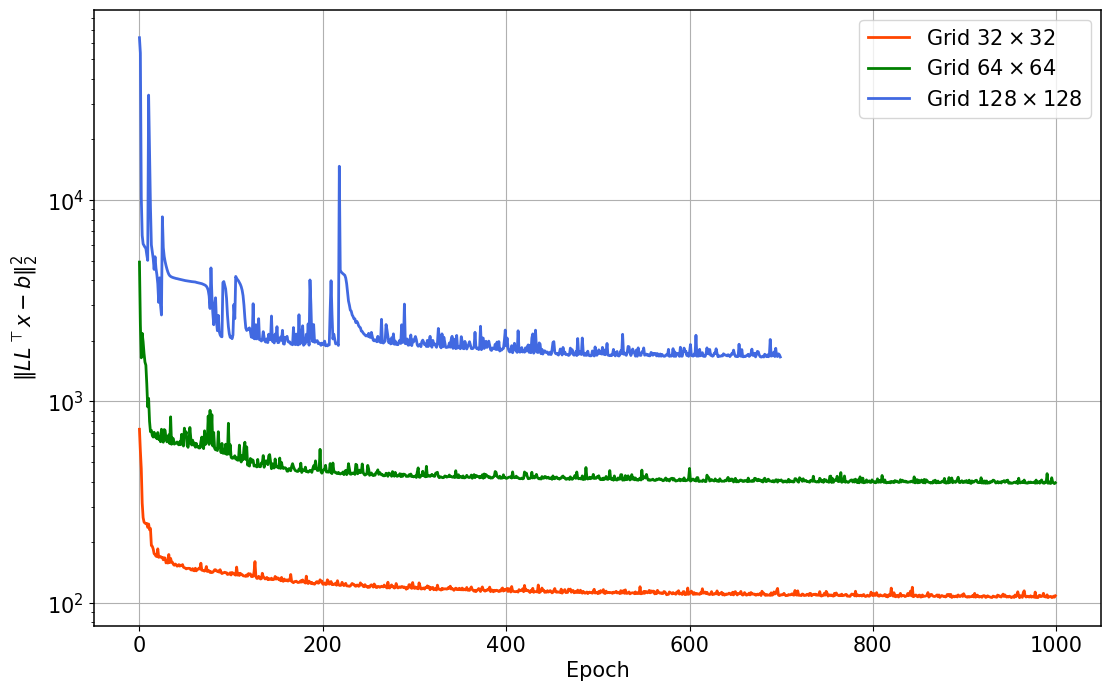

In [43]:
plt.rcParams['figure.figsize'] = (13, 8)
plt.rcParams['font.size'] = 15
plt.rcParams['font.style'] = 'normal'
plt.rcParams['axes.linewidth'] = 1.1#0.8
plt.set_cmap('jet')
# _, axes = plt.subplots(1, 2, figsize=(11, 7))
plt.plot(range(len(run_32['losses'][0])), run_32['losses'][1], label=r'$\text{Grid} \,\, 32\times32$', linewidth=2, c='orangered')
plt.plot(range(len(run_64['losses'][0])), run_64['losses'][1], label=r'$\text{Grid} \,\, 64\times64$', linewidth=2, c='green')
plt.plot(range(len(run_128['losses'][0])), run_128['losses'][1], label=r'$\text{Grid} \,\, 128\times128$', linewidth=2, c='royalblue')
plt.yscale('log')
plt.legend()
plt.grid()
plt.xlabel('Epoch')
plt.ylabel(r'$\Vert LL^\top x - b \Vert_2^2$');
# axes[1].plot(range(len(run_32['res_I'])), run_32['res_I'], label="CG")

In [ ]:
path = '/mnt/local/data/vtrifonov/prec-learning-Notay-loss/results_cases'
    pd.set_option('display.max_columns', 500)
    
    df = pd.read_csv(os.path.join(path, dir_name, 'meta_data.csv'), index_col=0)
    axes_num = 3 if with_cond else 2
    _, axes = plt.subplots(len(run_name), axes_num, figsize=figsize)
    if len(run_name) == 1:
        axes = np.expand_dims(axes, 0)
    
    for i, n in enumerate(run_name):
        file = os.path.join(path, dir_name, n+'.npz')
        run = jnp.load(file)
        axes[i, 0].plot(range(len(run['losses'][0])), run['losses'][1], label='Test')
        axes[i, 0].plot(range(len(run['losses'][0])), run['losses'][0], label='Train')
        axes[i, 0].legend()
        axes[i, 0].set_yscale('log')
        axes[i, 0].set_xlabel('Epoch')
        axes[i, 0].set_ylabel('Loss')
        axes[i, 0].grid()
        axes[i, 0].set_title(n)
        
        axes[i, -1].plot(range(len(run['res_I'])), run['res_I'], label="CG")
        axes[i, -1].plot(range(len(run['res_LLT'])), run['res_LLT'], label="PCG")
        axes[i, -1].legend()
        axes[i, -1].set_yscale('log')
        axes[i, -1].set_xlabel('Iteration')
        axes[i, -1].set_ylabel('$\|res\|$')
        axes[i, -1].grid()

In [6]:
folder = 'div_k_grad05_128_full_dataset'
df = read_meta_data(folder)

In [7]:
print(df.shape)
df#.head()

(18, 27)


,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg
tyclof,div_k_grad,128,0.5,1000,200,l_ilu0,8,700,0.0050,None,250,NaN,NaN,1,35.671833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.338820,4401.332017,1952.670286
d6fa63,div_k_grad,128,0.5,1000,200,l_ilu0,8,700,0.0010,None,250,1692.34310,1757.34810,1,35.671833,-0.081848,NaN,NaN,NaN,NaN,70.0,91.0,115.0,138.0,20.263916,4394.649912,1950.421677
kdb66m,div_k_grad,128,0.5,1000,200,l_ilu0,8,700,0.0005,None,250,1668.06480,1694.47240,1,35.671837,-0.066925,NaN,NaN,NaN,NaN,69.0,91.0,116.0,138.0,21.124683,4394.286041,1950.559658
cs4vmg,div_k_grad,128,0.5,1000,200,l_ict,8,700,0.0050,None,250,2534.86960,2667.49320,1,35.671830,-0.129469,NaN,NaN,NaN,NaN,190.0,NaN,NaN,NaN,196.201471,6326.465596,2875.549369
3rpxrp,div_k_grad,128,0.5,1000,200,l_ict,8,700,0.0010,None,250,605.90610,620.28625,1,35.671837,-0.051970,NaN,NaN,NaN,NaN,47.0,61.0,77.0,93.0,194.560696,6320.922523,2873.273647
85ths8,div_k_grad,128,0.5,1000,200,l_ict,8,700,0.0005,None,250,603.99460,618.62933,1,35.671833,-0.045086,NaN,NaN,NaN,NaN,49.0,64.0,82.0,98.0,200.631803,6320.630572,2873.269189
02u2w0,div_k_grad,128,0.5,1000,200,l_ilu0,16,700,0.0050,None,250,3909.54150,4043.81130,1,35.671837,0.051485,NaN,NaN,NaN,NaN,192.0,NaN,NaN,NaN,20.128177,4147.128341,1949.987870
yfbetl,div_k_grad,128,0.5,1000,200,l_ilu0,16,700,0.0010,None,250,1692.16020,1662.99840,1,35.671837,-0.071332,NaN,NaN,NaN,NaN,68.0,89.0,115.0,136.0,20.163456,4142.657249,1950.001930
c0rm95,div_k_grad,128,0.5,1000,200,l_ilu0,16,700,0.0005,None,250,1777.34840,1804.73940,1,35.671837,-0.062824,NaN,NaN,NaN,NaN,74.0,98.0,126.0,150.0,21.454194,4142.846066,1950.058713
t2t4ks,div_k_grad,128,0.5,1000,200,l_ict,16,700,0.0050,None,250,2498.00700,2661.56300,1,35.671837,-0.135125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,195.603221,6111.454107,2873.817329


In [4]:
df.columns

Index(['pde', 'grid', 'variance', 'N_samples_train', 'N_samples_test',
       'lhs_type', 'batch_size', 'epoch_num', 'lr_start', 'schedule_params',
       'cg_valid_repeats', 'train_loss_last', 'test_loss_last',
       'cond_prec_system', 'cond_initial_system', 'alpha', 'cg_1e_3',
       'cg_1e_6', 'cg_1e_9', 'cg_1e_12', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9',
       'pcg_1e_12', 'time_data', 'time_train', 'time_pcg'],
      dtype='object')

In [5]:
q = "pde == 'div_k_grad' and grid == 32 and variance == 0.7 and lhs_type == 'l_ilu0' and pcg_1e_12 > 0"
check = df.query(q).index
print(check.shape)
df.query(q).loc[:, ['alpha', 'lhs_type', 'variance', 'batch_size', 'epoch_num', 'lr_start', 'train_loss_last', 'test_loss_last', 'pcg_1e_3', 'pcg_1e_6', 'pcg_1e_9', 'pcg_1e_12']]
# df.query(q).loc[:, ['lhs_type']]

(6,)


,alpha,lhs_type,variance,batch_size,epoch_num,lr_start,train_loss_last,test_loss_last,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12
frf0bv,-0.061784,l_ilu0,0.7,8.0,1000.0,0.0010,123.110910,124.22222,27.0,36.0,46.0,55.0
qe10k1,-0.049261,l_ilu0,0.7,8.0,1000.0,0.0005,125.847336,127.82276,27.0,36.0,45.0,55.0
cx3al7,-0.050492,l_ilu0,0.7,16.0,1000.0,0.0010,132.962170,131.97993,28.0,37.0,46.0,57.0
2wdxit,-0.042513,l_ilu0,0.7,16.0,1000.0,0.0005,145.143770,145.65552,28.0,38.0,48.0,58.0
66t9is,-0.057414,l_ilu0,0.7,32.0,1000.0,0.0010,145.237990,143.78392,28.0,38.0,48.0,58.0
khwr2k,-0.062164,l_ilu0,0.7,32.0,1000.0,0.0005,159.536100,157.93260,29.0,39.0,49.0,59.0


,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg
frf0bv,div_k_grad,32.0,0.7,1000.0,200.0,l_ilu0,8.0,1000.0,0.001,None,60.0,123.11091,124.22222,1.0,30.534678,-0.061784,NaN,NaN,NaN,NaN,27.0,36.0,46.0,55.0,16.473527,448.780415,6.653999


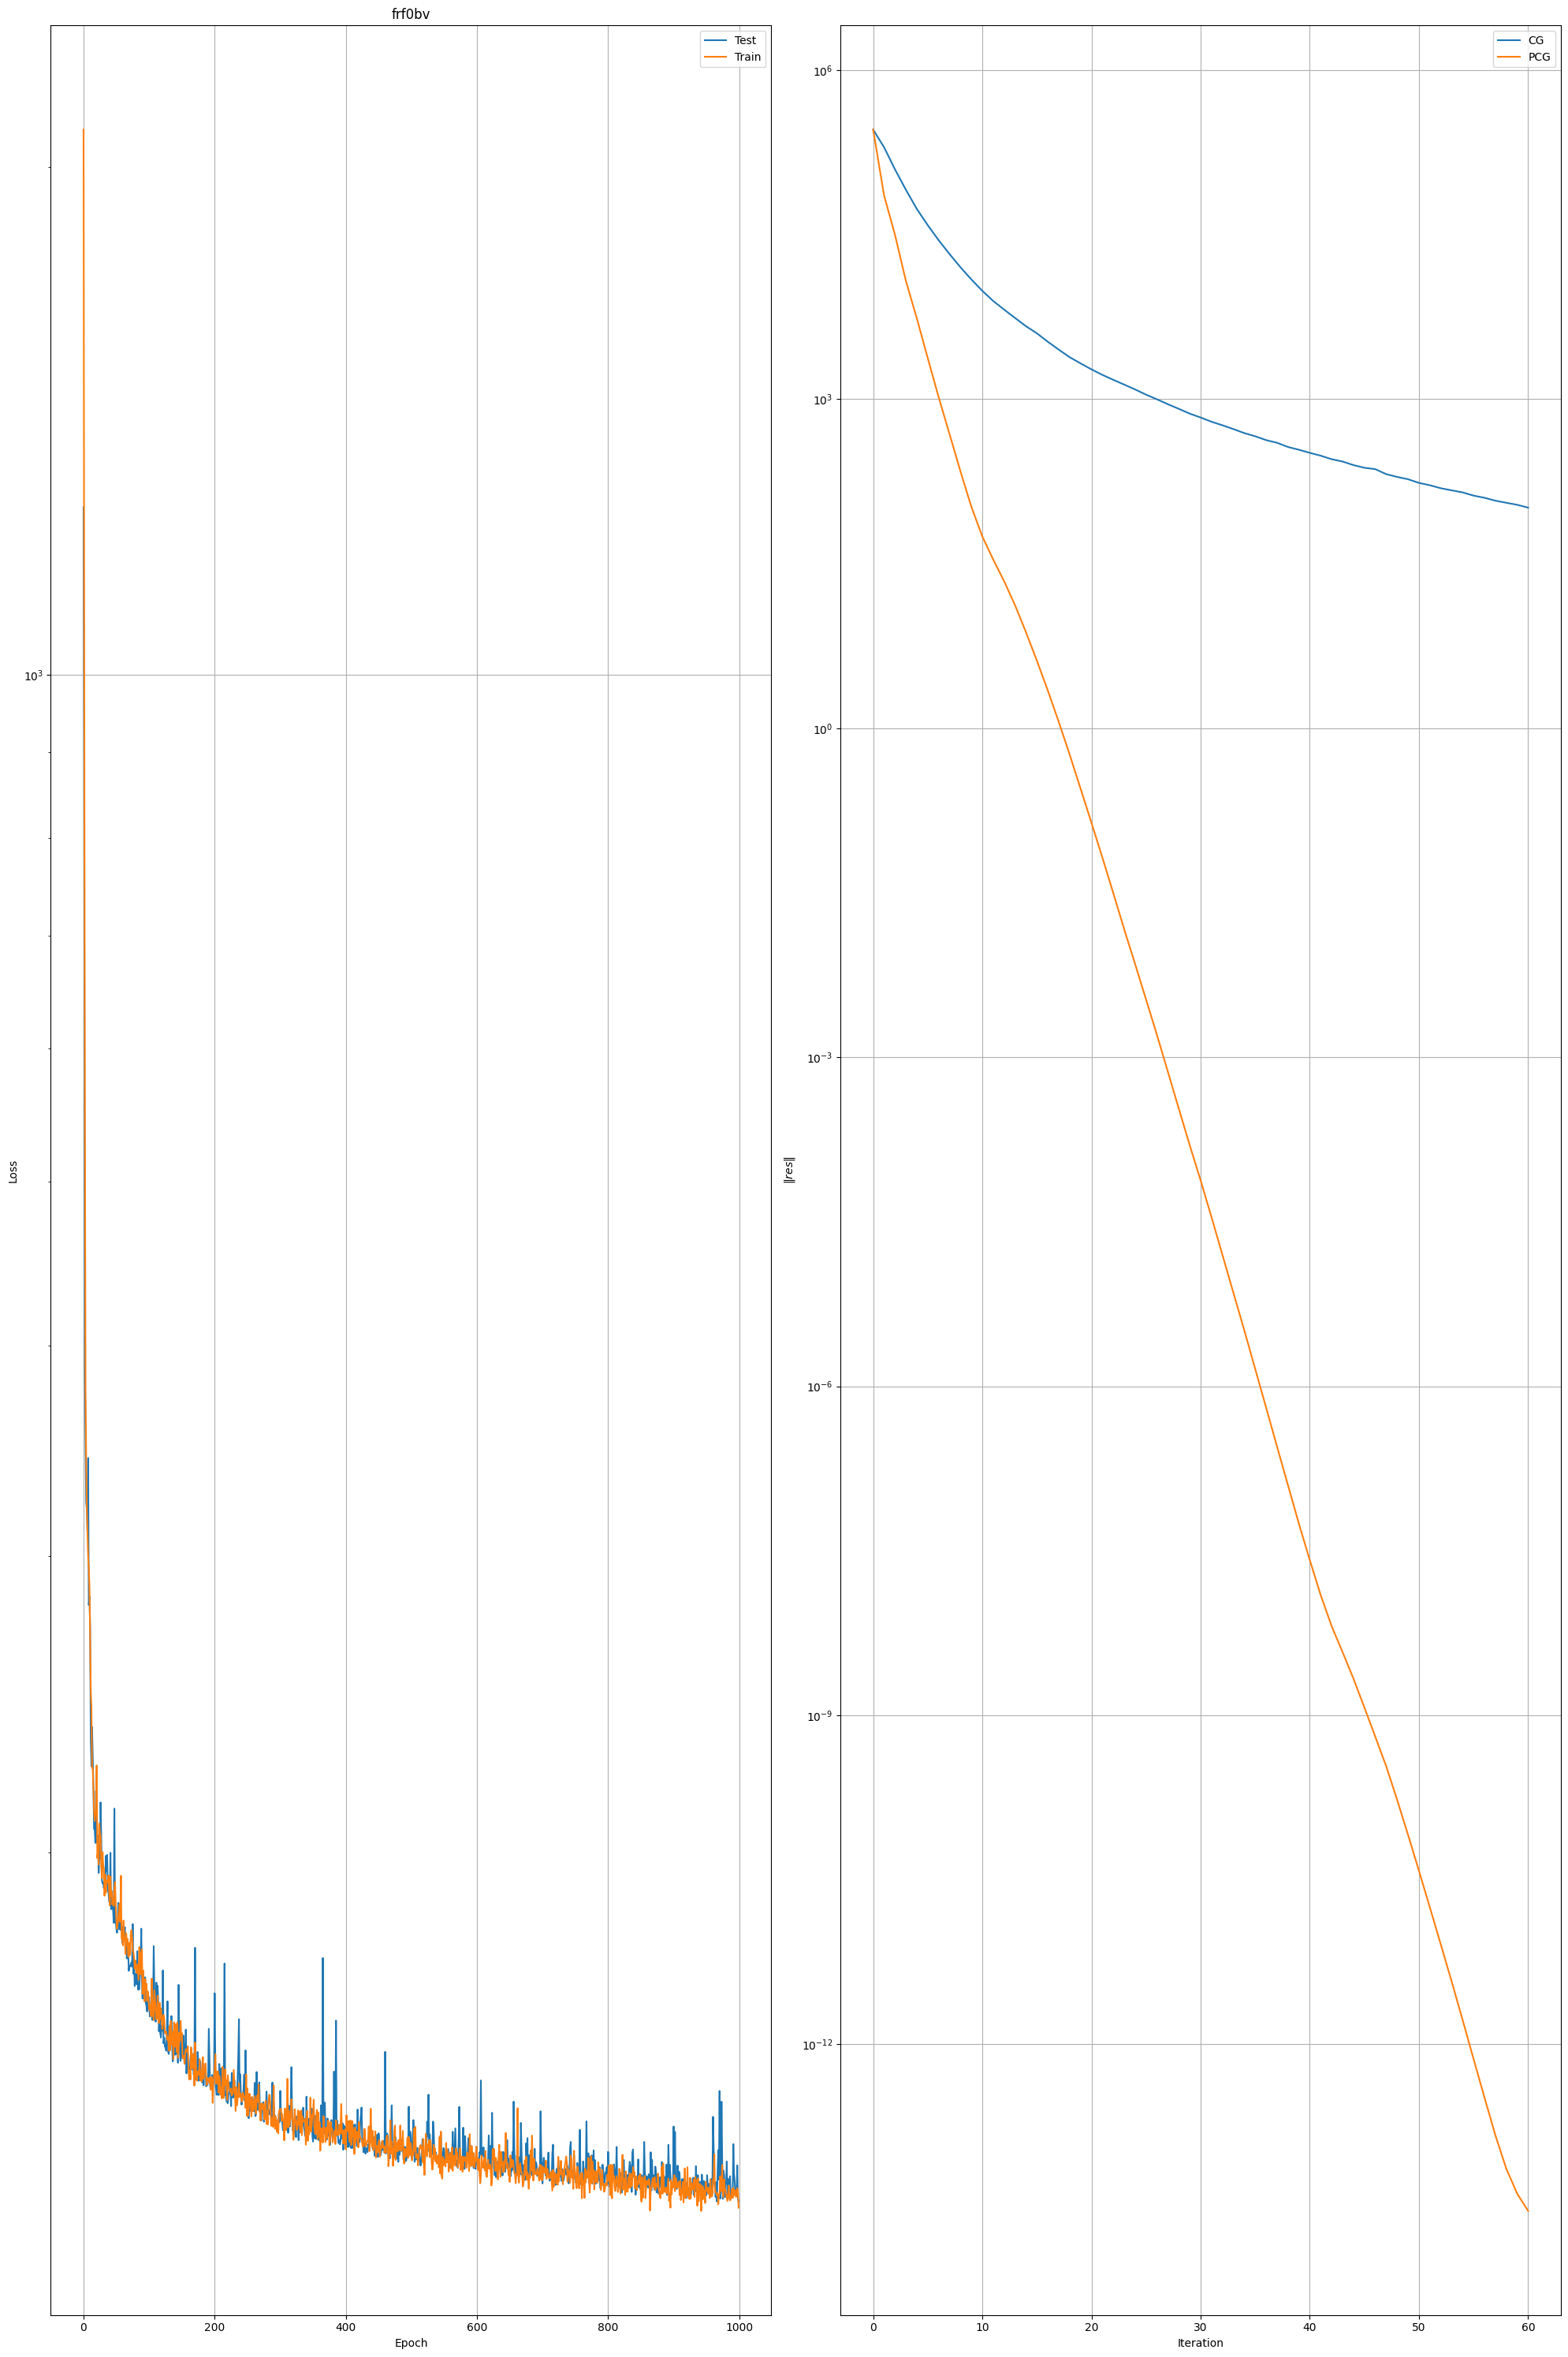

In [6]:
parse_run(folder, ['frf0bv'], (20, 30), with_cond=False) # Second argument may be a list of idnex or 'check'

In [19]:
folder = 'div_k_grad07_128_full_dataset'
df = read_meta_data(folder)

In [20]:
df.index

Index(['b3n3z4', '87jxom', 'tj6vzi', 'uapxe5', 'zfah2u', 'i5to6f', 'fv2k25',
       '56vaoe', '19gkui', 'tlwtf2', '12bcyt', 'zxjtr0', 'lxyq4w', '9vfyi9',
       'gcmyuu', 'j17tkv', 'f1pyfw', '5rfrhw'],
      dtype='object')

,pde,grid,variance,N_samples_train,N_samples_test,lhs_type,batch_size,epoch_num,lr_start,schedule_params,cg_valid_repeats,train_loss_last,test_loss_last,cond_prec_system,cond_initial_system,alpha,cg_1e_3,cg_1e_6,cg_1e_9,cg_1e_12,pcg_1e_3,pcg_1e_6,pcg_1e_9,pcg_1e_12,time_data,time_train,time_pcg
87jxom,div_k_grad,128,0.7,1000,200,l_ilu0,8,700,0.001,None,250,1752.9090,1706.9749,1,42.192330,-0.081111,NaN,NaN,NaN,NaN,76.0,99.0,125.0,149.0,20.207611,4399.334216,1950.312606
zfah2u,div_k_grad,128,0.7,1000,200,l_ict,8,700,0.001,None,250,691.8837,664.9147,1,42.192318,-0.037417,NaN,NaN,NaN,NaN,53.0,69.0,88.0,104.0,193.524847,6321.648467,2873.238360


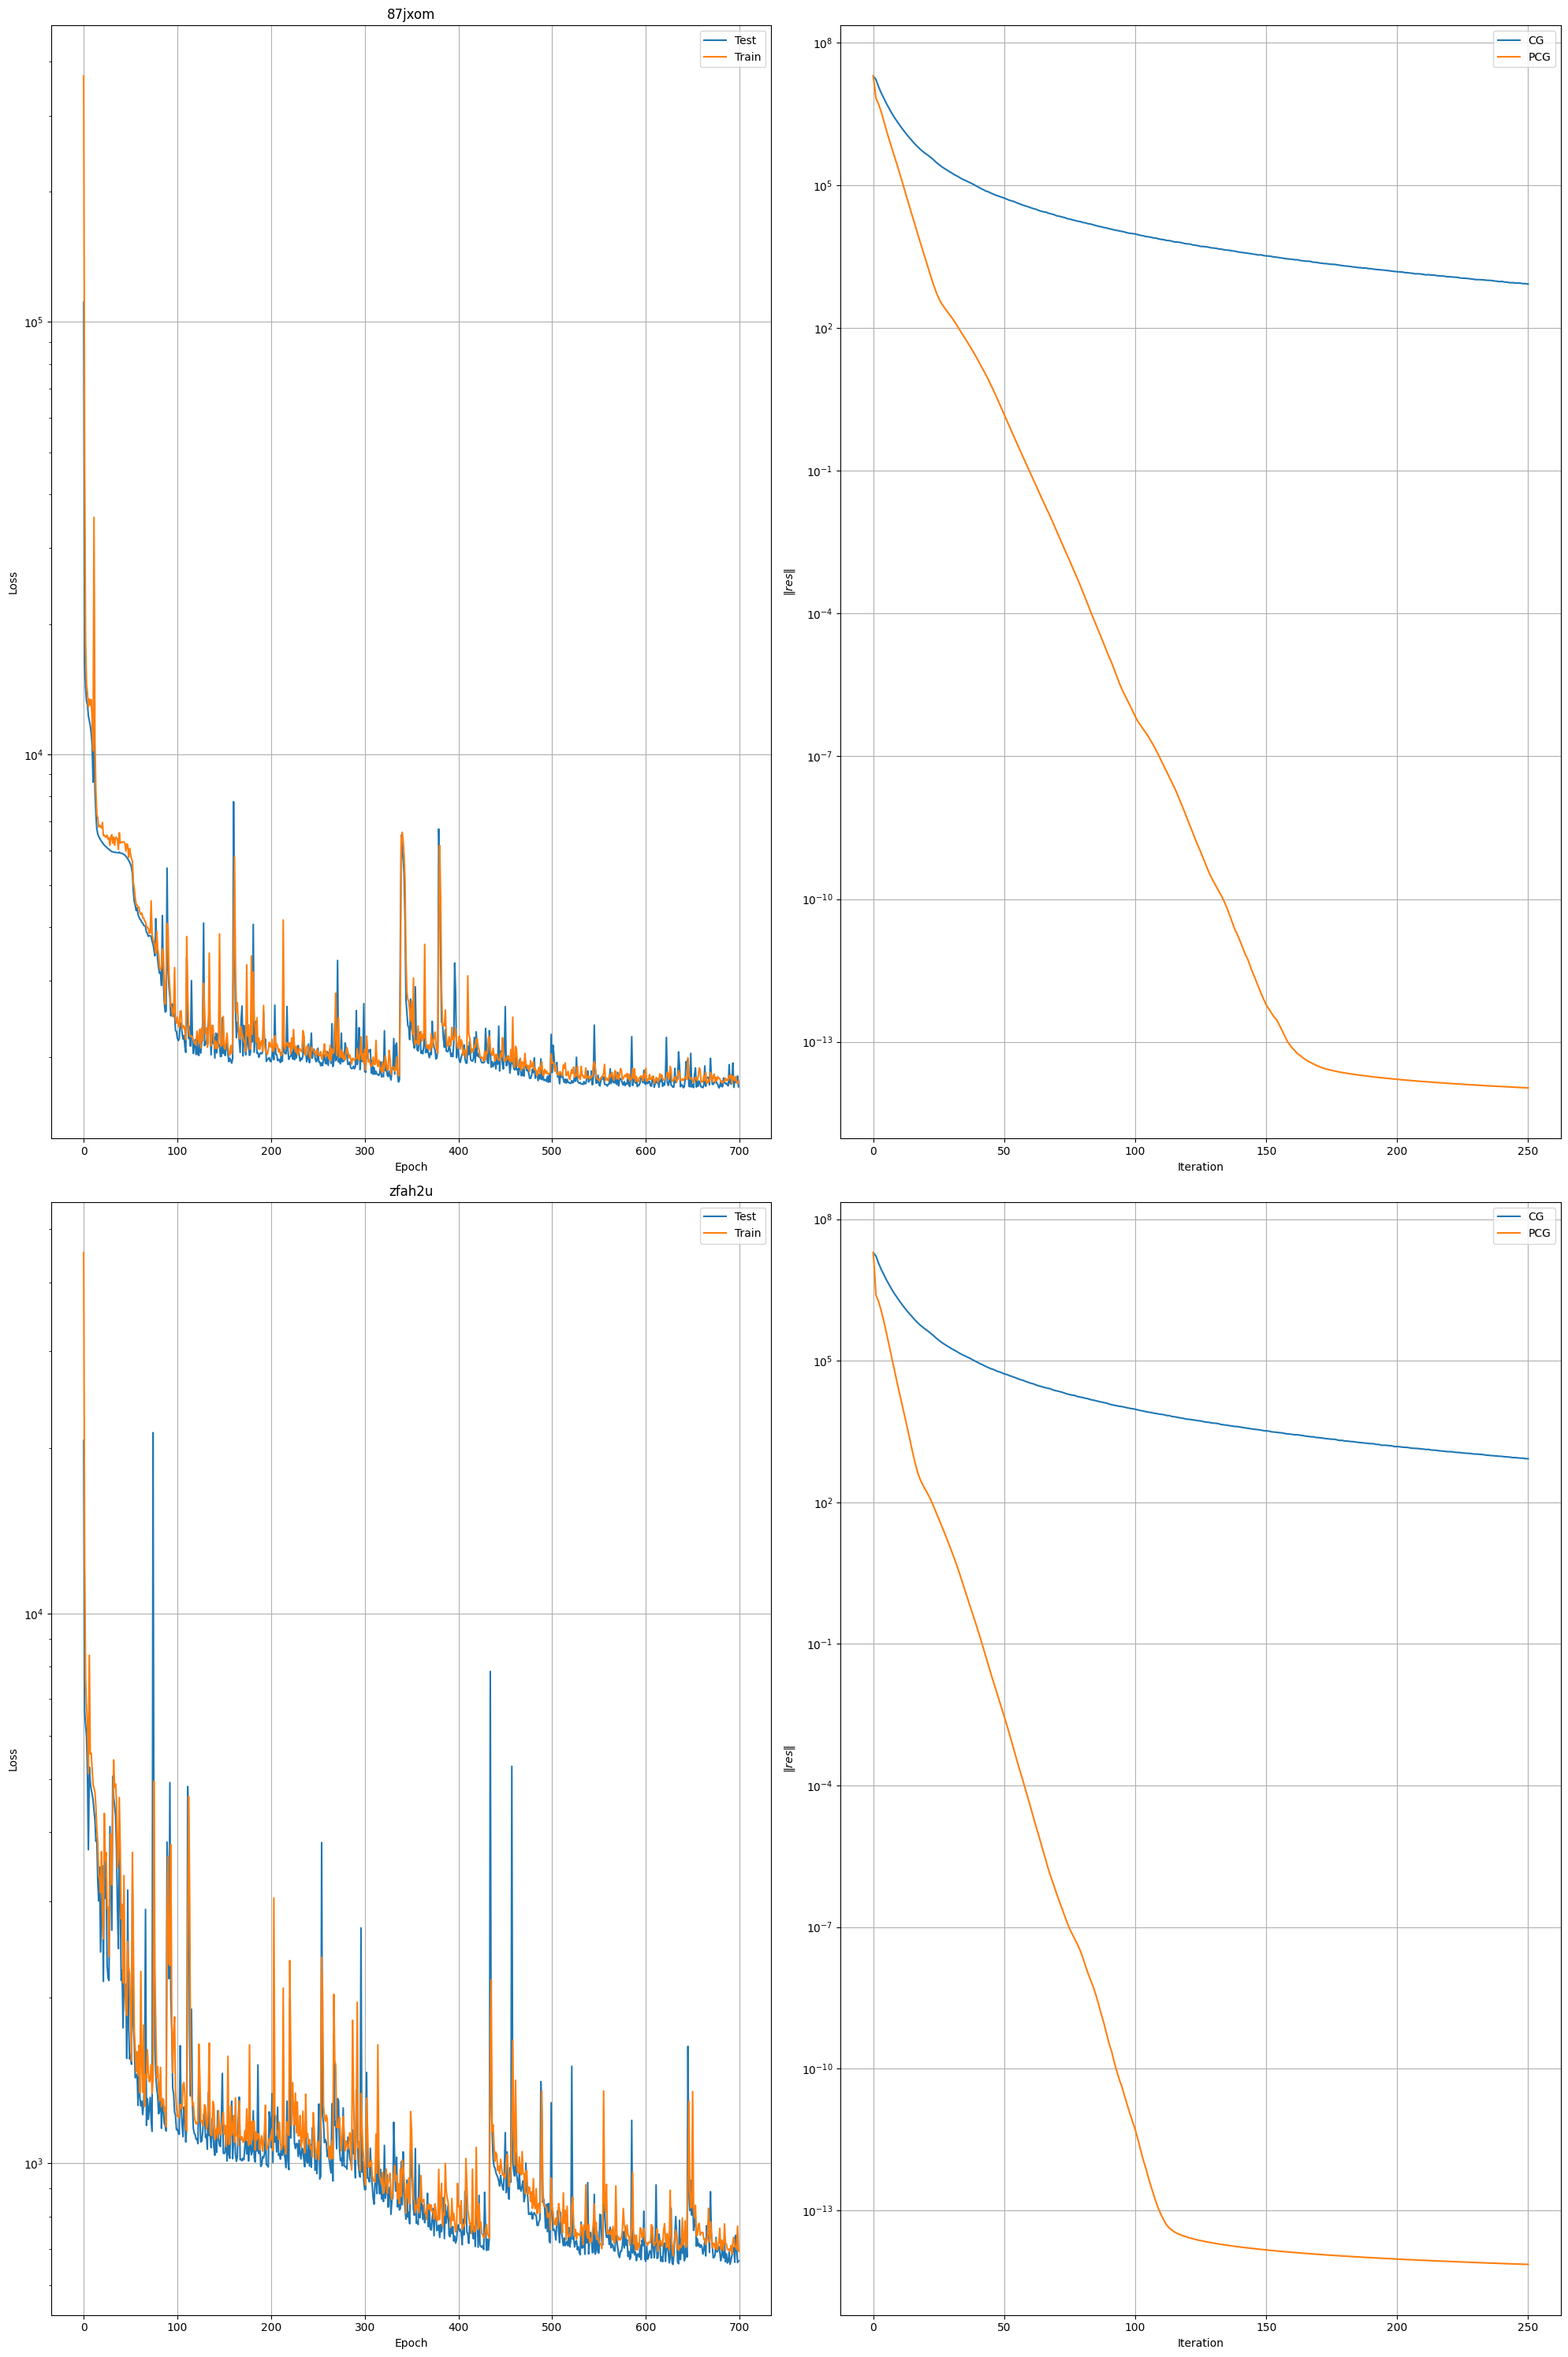

In [21]:
names = ['87jxom', 'zfah2u']
parse_run(folder, names, (20, 30), with_cond=False) # Second argument may be a list of idnex